# Final Project | $SpendWise$  

Batch FTDS-RMT-036  

Group 001  

Team members:  
- Azkia Mudrikah Al Mawaddah as Data Analyst  
- Ediashta Narendra Amarussalam as Data Scientist  
- Muchammad Septyo Al Birqi Purnama as Data Scientist  
- Yocia Meiko Oke as Data Engineer

HuggingFace : [Group1 Deployment](https://huggingface.co/spaces/ymo980/spendwise)  
Original Dataset : [Group1 Dataset](https://data.mendeley.com/datasets/wkjdmrmrg4/4)  
Team GitHub : [Group1 GitHub](https://github.com/FTDS-assignment-bay/p2-final-project-ftds-036-rmt-group-001)  

# i. Background   

Paylater merupakan sumber pendapatan tambahan (extended revenue stream) yang berasal dari ekosistem yang telah matang, seperti e-commerce atau layanan ojek online beserta turunannya. Dengan menentukan apakah pelanggan yang sudah ada dalam ekosistem tersebut akan memanfaatkan layanan paylater atau tidak, keuntungan dapat diperoleh tanpa biaya tambahan untuk akuisisi pelanggan (non-profit pada customer acquisition) dan dengan efisiensi biaya pemasaran serta profit pada communication cost.

# ii. Problem statement and objectives  

$SpendWise$ bertujuan untuk menentukan apakah existing customer akan menggunakan produk layanan PayLater atau tidak, berdasarkan dengan kondisi demografis serta kebiasaan berbelanja konsumen. Model machine learning akan dibuat menggunakan algoritma KNN, SVM, decision tree, random forest, dan adaptive boosting. Kelima model tersebut akan diuji pada data train dan data test, lalu dibandingkan berdasarkan metrik evaluasi recall dan F1-score. Model dengan nilai recall dan F1-score terbaik akan dipilih untuk disimpan dan digunakan dalam memprediksi data baru. Pemilihan metrik recall bertujuan untuk memastikan model mampu mendeteksi sebanyak mungkin kasus positif yang sebenarnya, sehingga meminimalkan risiko kesalahan dalam klasifikasi data kritis. Sementara itu, F1-score dipilih karena menggabungkan keseimbangan antara presisi dan recall, memastikan model tidak hanya akurat tetapi juga dapat diandalkan dalam mendeteksi risiko secara konsisten.

# iii. Import Libraries  
Sebelum melakukan load data, dilakukan import libraries terlebih dahulu.  
- pandas digunakan untuk membaca file csv dan untuk membuat dataframe
- seaborn dan matplotlib digunakan untuk visualisasi data khususnya pada bagian EDA
- scipy.stats dilakukan untuk melakukan perhitungan statistika 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

# iv. Load, Clean, and Manipulating Data  

Sebelumnya tim kami sudah melakukan EDA untuk data original, maka pada bagian ini EDA dilakukan pada data yang pernyataan-pernyataannya sudah direduksi.

In [2]:
# load data

df_ = pd.read_csv('initial_cleaning_rounded.csv')
df = df_.copy()
df.head(5)

,ID,Gender,Location,E-Paylater User Status,Educational Background,Year of Birth,Job Status,Monthly Income,Online Shopping Expenditure Percentage,Impulsive Buying Behavior Score,Promotion Score,Social Influence Score,Happiness Score,Self Control Score,Normative Evaluation Score
0,1,Female,West Sumatera,Non e-paylater user,Bachelor/Diploma IV,1997,Working,"Rp 2,500,001 - Rp 5,000,000",Less than 20%,2,3,2,4,4,3
1,2,Male,DKI Jakarta,e-paylater user,Until Senior High School,2002,Students,"Rp 1,000,001 - Rp 2,500,000",21% - 40%,2,3,2,4,3,5
2,3,Male,West Sumatera,Non e-paylater user,Until Senior High School,2002,Students,"Rp 1,000,001 - Rp 2,500,000",Less than 20%,3,3,3,4,3,3
3,4,Female,West Sumatera,e-paylater user,Bachelor/Diploma IV,2002,Students,"Less than Rp 1,000,000",Less than 20%,4,4,4,4,2,1
4,5,Male,West Sumatera,e-paylater user,Bachelor/Diploma IV,2002,Working,"More than Rp 10,000,000",Less than 20%,1,2,2,3,3,3


In [3]:
# memeriksa identitas dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   ID                                      810 non-null    int64 
 1   Gender                                  810 non-null    object
 2   Location                                810 non-null    object
 3   E-Paylater User Status                  810 non-null    object
 4   Educational Background                  810 non-null    object
 5   Year of Birth                           810 non-null    int64 
 6   Job Status                              810 non-null    object
 7   Monthly Income                          810 non-null    object
 8   Online Shopping Expenditure Percentage  810 non-null    object
 9   Impulsive Buying Behavior Score         810 non-null    int64 
 10  Promotion Score                         810 non-null    int64 
 11  Social

Rangkuman identitas dataframe di atas menunjukkan data terdiri dari 810 rows tanpa missing value karena jumlah non-null counts untuk seluruh kolom sama dengan jumlah rows data, 8 kolom memliki nilai dengan tipe data integer, dan 7 kolom memliki nilai dengan tipe data object. Sekilas terlihat bahwa monthly income dan online shopping expenditure percentage harusnya memiliki nilai dengan tipe data numeric, namun dalam data ini nilai dari kedua kolom tersebut digolongkan ke dalam beberapa rentang tertentu seperti monthly income less than Rp1.000.000 dan online shopping expenditure percentage 20%-40% sehingga kedua kolom tersebut memiliki nilai dengan tipe data object. Selanjutnya dilakukan pemeriksaan apakah terdapat data yang terduplikasi dalam dataframe ini atau tidak.

In [4]:
# memeriksa duplikat data

df.duplicated().sum()

0

Hasil pemeriksaan menunjukkan bahwa data tidak memiliki data yang terduplikat. Duplikat data ini harus diperiksa dan di-drop jika ada, untuk menghindari bias pada hasil analisis. Selanjutkan dilakukan normalisasi nama kolom untuk mempermudah proses analisis.

In [5]:
# normalisasi kolom
df.columns = df.columns.str.replace('[^a-zA-Z0-9]', # menghapus karakter selain huruf
                                    '', # menghapus spasi
                                      regex=True)

# menampilkan 5 data pertama setelah normalisasi kolom
df.head(5)

,ID,Gender,Location,EPaylaterUserStatus,EducationalBackground,YearofBirth,JobStatus,MonthlyIncome,OnlineShoppingExpenditurePercentage,ImpulsiveBuyingBehaviorScore,PromotionScore,SocialInfluenceScore,HappinessScore,SelfControlScore,NormativeEvaluationScore
0,1,Female,West Sumatera,Non e-paylater user,Bachelor/Diploma IV,1997,Working,"Rp 2,500,001 - Rp 5,000,000",Less than 20%,2,3,2,4,4,3
1,2,Male,DKI Jakarta,e-paylater user,Until Senior High School,2002,Students,"Rp 1,000,001 - Rp 2,500,000",21% - 40%,2,3,2,4,3,5
2,3,Male,West Sumatera,Non e-paylater user,Until Senior High School,2002,Students,"Rp 1,000,001 - Rp 2,500,000",Less than 20%,3,3,3,4,3,3
3,4,Female,West Sumatera,e-paylater user,Bachelor/Diploma IV,2002,Students,"Less than Rp 1,000,000",Less than 20%,4,4,4,4,2,1
4,5,Male,West Sumatera,e-paylater user,Bachelor/Diploma IV,2002,Working,"More than Rp 10,000,000",Less than 20%,1,2,2,3,3,3


Nama-nama kolom sudah berhasil diubah, selanjutnya dilakukan pemeriksaan untuk masing-masing nilai unik pada setiap kolom. Hal ini bertujuan untuk mempermudah dalam menentukan jenis visualisasi pada analisis.

In [6]:
# memeriksa banyak nilai unik pada setiap kolom
df.nunique()

ID                                     810
Gender                                   2
Location                                23
EPaylaterUserStatus                      2
EducationalBackground                    4
YearofBirth                             40
JobStatus                                4
MonthlyIncome                            6
OnlineShoppingExpenditurePercentage      6
ImpulsiveBuyingBehaviorScore             5
PromotionScore                           5
SocialInfluenceScore                     5
HappinessScore                           5
SelfControlScore                         5
NormativeEvaluationScore                 5
dtype: int64

Hasil run code di atas menunjukkan jumlah nilai unik pada masing-masing kolom, terlihat bahwa nilai unik setiap kolom cenderung berada di rentang yang tidak lebih dari 6 dengan 2 kolom yaitu lokasi dan year of birth memiliki jumlah nilai unik yang lebih banyak dari kolom lainnya yaitu 23 dan 40. Selanjutnya dilakukan pemeriksaan deskriptif untuk kolom numerik.

In [7]:
# analisis deskriptif untuk kolom numerik

df.describe()

,ID,YearofBirth,ImpulsiveBuyingBehaviorScore,PromotionScore,SocialInfluenceScore,HappinessScore,SelfControlScore,NormativeEvaluationScore
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,405.500000,1994.111111,2.769136,2.354321,2.339506,3.520988,3.281481,3.430864
std,233.971152,10.020745,0.952408,1.144293,1.021182,0.869866,0.640440,0.933267
min,1.000000,1966.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,203.250000,1987.000000,2.000000,1.000000,2.000000,3.000000,3.000000,3.000000
50%,405.500000,1999.000000,3.000000,2.000000,2.000000,4.000000,3.000000,3.000000
75%,607.750000,2002.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000
max,810.000000,2005.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Hasil analisis deskriptif di atas menunjukkan bahwa umur responden berada di rentang kelahiran tahun 1966-2005 menunjukkan bahwa penggunaan e-commerce dan bisnis sejenis tersebar ke berbagai generasi. Variasi generasi yang beragam menunjukkan bahwa saat ini e-commerce dan bisnis sejenis mudah diakses tanpa hambatan. Hal ini memungkinkan penggunaan pay later juga dapat menjangkau seluruh generasi, menjadi peluang yang cukup baik bagi pemilik bisnis untuk menawarkan pay later-nya ke seluruh pengguna aplikasi.

# v. Exploratory Data Analysis  

Beberapa pertanyaan terkait kebiasaan responden dalam berbelanja online dan karakteristik responden sudah dijawab pada EDA original data, oleh karena itu, pada bagian ini EDA dilakukan berfokus pada pertanyaan-pertanyaan berikut:

1. Bagaimana proporsi gender terhadap impulsive buying behavior?  
2. Apakah setiap perilaku saling berkorelasi?
3. Bagaimana kecenderungan responden terhadap setiap perilaku?
4. Bagaimana pengaruh keenam variabel pernyataan terhadap keputusan untuk menggunakan pay later?

Untuk menjawab pertanyaan di atas, kita lakukan proses-proses berikut

## 1. Bagaimana proporsi gender terhadap impulsive buying behavior? 

In [16]:
pd.crosstab(df['Gender'], df['ImpulsiveBuyingBehaviorScore'], normalize='index') * 100

ImpulsiveBuyingBehaviorScore,1,2,3,4,5
Gender,,,,,
Female,6.352087,37.205082,28.312160,27.404719,0.725953
Male,8.880309,37.451737,26.640927,26.254826,0.772201


Baik pria maupun wanita cenderung memiliki skor Impulsive Buying Behavior yang didominasi oleh nilai 2 dan 3, dengan proporsi terbesar berada pada nilai 2 (sekitar 37%). Skor 5 (sangat setuju) memiliki proporsi yang sangat rendah (<1%) untuk kedua gender. Hal ini menunjukkan bahwa sebagian besar responden, terlepas dari gender, memiliki tingkat perilaku impulsif yang moderat hingga rendah.

## 2. Apakah setiap perilaku saling berkorelasi?

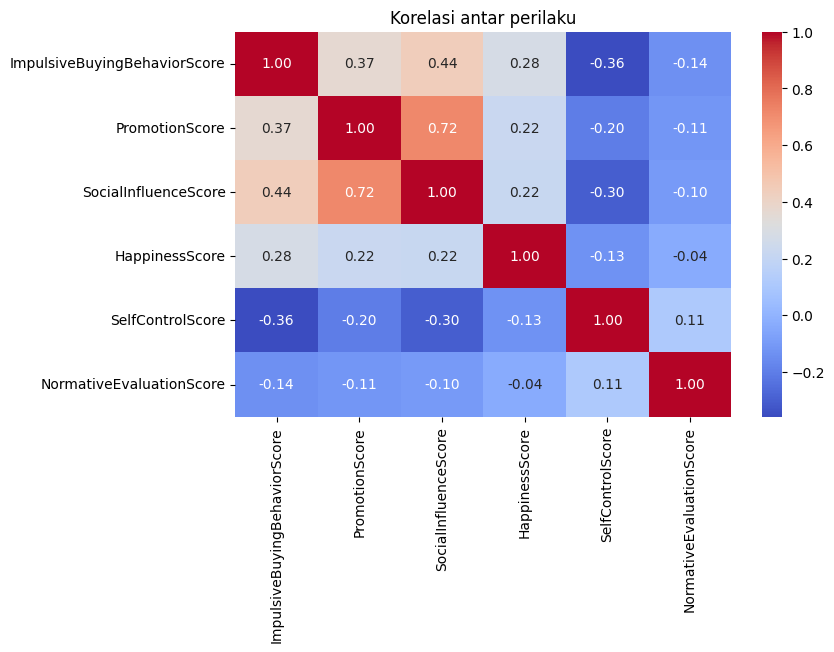

In [26]:
correlation_matrix = df[['ImpulsiveBuyingBehaviorScore', 'PromotionScore', 
                         'SocialInfluenceScore', 'HappinessScore', 
                         'SelfControlScore', 'NormativeEvaluationScore']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antar perilaku')
plt.show()

Hasil visualisasi di atas menunjukkan:  
- PromotionScore dan SocialInfluenceScore memiliki korelasi tinggi (0.72), menunjukkan bahwa promosi cenderung memengaruhi persepsi sosial.
- ImpulsiveBuyingBehaviorScore memiliki korelasi positif dengan SocialInfluenceScore (0.44) dan PromotionScore (0.37), artinya promosi dan pengaruh sosial dapat meningkatkan perilaku pembelian impulsif.
- SelfControlScore berkorelasi negatif dengan ImpulsiveBuyingBehaviorScore (-0.36), menunjukkan bahwa semakin tinggi pengendalian diri, semakin rendah perilaku pembelian impulsif.
- Korelasi lainnya relatif lemah, menunjukkan hubungan yang tidak signifikan.

## 3. Bagaimana kecenderungan responden terhadap setiap perilaku?

In [18]:
columns = ['ImpulsiveBuyingBehaviorScore', 'PromotionScore', 
          'SocialInfluenceScore', 'HappinessScore', 
          'SelfControlScore', 'NormativeEvaluationScore']

summary = pd.DataFrame({
    col: df[col].value_counts().sort_index() for col in columns
}).fillna(0).astype(int)

summary


,ImpulsiveBuyingBehaviorScore,PromotionScore,SocialInfluenceScore,HappinessScore,SelfControlScore,NormativeEvaluationScore
1,58,236,188,20,2,17
2,302,247,294,90,49,99
3,225,136,201,203,507,315
4,219,186,119,442,223,276
5,6,5,8,55,29,103


output di atas menunjukkan bahwa:

- **ImpulsiveBuyingBehaviorScore**: Sebagian besar responden memiliki skor **2** (302 responden) atau **3** (225 responden), menunjukkan kecenderungan perilaku impulsif yang moderat.  
- **PromotionScore** dan **SocialInfluenceScore**: Banyak responden cenderung memberikan skor **2** atau **3**, menunjukkan pengaruh promosi dan sosial yang sedang.  
- **HappinessScore**: Skor **4** (442 responden) mendominasi, menunjukkan tingkat kebahagiaan yang tinggi pada mayoritas responden.  
- **SelfControlScore**: Mayoritas responden memberikan skor **3** (507 responden), menunjukkan kontrol diri yang moderat.  
- **NormativeEvaluationScore**: Responden cenderung memberikan skor **3** (315 responden) dan **4** (276 responden), mencerminkan evaluasi norma yang cukup tinggi.  

Responden umumnya menunjukkan sikap moderat hingga positif pada sebagian besar perilaku yang diukur.

## 4. Bagaimana pengaruh keenam variabel pernyataan terhadap keputusan untuk menggunakan pay later?

In [19]:
# encode kolom EPaylaterUserStatus
df['EPaylaterUserStatus_Encoded'] = df['EPaylaterUserStatus'].map({'Non e-paylater user': 0, 'e-paylater user': 1})
df.head(5)

,ID,Gender,Location,EPaylaterUserStatus,EducationalBackground,YearofBirth,JobStatus,MonthlyIncome,OnlineShoppingExpenditurePercentage,ImpulsiveBuyingBehaviorScore,PromotionScore,SocialInfluenceScore,HappinessScore,SelfControlScore,NormativeEvaluationScore,EPaylaterUserStatus_Encoded
0,1,Female,West Sumatera,Non e-paylater user,Bachelor/Diploma IV,1997,Working,"Rp 2,500,001 - Rp 5,000,000",Less than 20%,2,3,2,4,4,3,0
1,2,Male,DKI Jakarta,e-paylater user,Until Senior High School,2002,Students,"Rp 1,000,001 - Rp 2,500,000",21% - 40%,2,3,2,4,3,5,1
2,3,Male,West Sumatera,Non e-paylater user,Until Senior High School,2002,Students,"Rp 1,000,001 - Rp 2,500,000",Less than 20%,3,3,3,4,3,3,0
3,4,Female,West Sumatera,e-paylater user,Bachelor/Diploma IV,2002,Students,"Less than Rp 1,000,000",Less than 20%,4,4,4,4,2,1,1
4,5,Male,West Sumatera,e-paylater user,Bachelor/Diploma IV,2002,Working,"More than Rp 10,000,000",Less than 20%,1,2,2,3,3,3,1


In [20]:
# Daftar skor numerik
scores = ['ImpulsiveBuyingBehaviorScore', 'PromotionScore', 'SocialInfluenceScore', 
          'HappinessScore', 'SelfControlScore', 'NormativeEvaluationScore']

results = []

# Hitung korelasi point-biserial untuk setiap skor
for score in scores:
    correlation, p_value = pointbiserialr(df['EPaylaterUserStatus_Encoded'], df[score])
    # Interpretasi
    if p_value < 0.05:
        interpretation = 'Significant'
    else:
        interpretation = 'Not Significant'
    # Tambahkan hasil ke list
    results.append({
        'Score': score,
        'Correlation': correlation,
        'P-Value': p_value,
        'Interpretation': interpretation
    })

# Buat DataFrame dari hasil
results_df = pd.DataFrame(results)

# Tampilkan DataFrame
results_df

,Score,Correlation,P-Value,Interpretation
0,ImpulsiveBuyingBehaviorScore,0.188537,6.439764e-08,Significant
1,PromotionScore,0.454425,1.603657e-42,Significant
2,SocialInfluenceScore,0.378289,5.893310e-29,Significant
3,HappinessScore,0.048154,1.709514e-01,Not Significant
4,SelfControlScore,-0.144073,3.862857e-05,Significant
5,NormativeEvaluationScore,-0.048474,1.681205e-01,Not Significant


Hasil korelasi keenam variabel terhadap kolom 

1. **ImpulsiveBuyingBehaviorScore** memiliki korelasi positif sebesar 0,188 dan nilai p yang sangat kecil (p-value ≈ 6,44e-08), menunjukkan hubungan yang signifikan. Ini berarti semakin tinggi kecenderungan perilaku pembelian impulsif, semakin tinggi kemungkinan seseorang menjadi pengguna PayLater. Hubungan ini meskipun lemah, cukup jelas secara statistik.

2. **PromotionScore** menunjukkan korelasi yang cukup kuat sebesar 0,454 dan sangat signifikan (p-value ≈ 1,60e-42). Ini mengindikasikan bahwa pengguna PayLater lebih responsif terhadap promosi, yang berpotensi menjadi salah satu faktor pendorong utama dalam mengadopsi layanan ini.

3. **SocialInfluenceScore** memiliki korelasi positif sebesar 0,378 dan juga signifikan (p-value ≈ 5,89e-29). Ini menunjukkan bahwa faktor pengaruh sosial cukup berperan dalam keputusan pengguna untuk menggunakan PayLater, yang mengindikasikan pentingnya peran komunitas atau rekomendasi sosial.

4. **HappinessScore** menunjukkan korelasi yang sangat kecil sebesar 0,048 dan tidak signifikan (p-value ≈ 0,171). Ini menunjukkan bahwa tingkat kebahagiaan tidak berhubungan dengan keputusan untuk menggunakan layanan PayLater.

5. **SelfControlScore** menunjukkan korelasi negatif sebesar -0,144 dan signifikan (p-value ≈ 3,86e-05). Ini mengindikasikan bahwa semakin tinggi tingkat pengendalian diri, semakin kecil kemungkinan seseorang menggunakan layanan PayLater, mungkin karena preferensi untuk menghindari hutang atau pengeluaran tidak terkendali.

6. **NormativeEvaluationScore** memiliki korelasi negatif yang sangat kecil (-0,048) dan tidak signifikan (p-value ≈ 0,168), menunjukkan bahwa evaluasi normatif individu tidak memiliki pengaruh yang cukup berarti terhadap keputusan untuk menggunakan PayLater.

# vi. Kesimpulan

Berdasarkan analisis, beberapa temuan penting dapat dijadikan dasar pengambilan keputusan bisnis untuk pengembangan layanan E-Paylater:  

1. **Perilaku Impulsif dan Kontrol Diri:**  
Sebagian besar responden menunjukkan tingkat perilaku impulsif yang moderat hingga rendah (dominan pada skor 2 dan 3) dengan skor impulsif yang lebih tinggi dipengaruhi oleh promosi (**r = 0.37**) dan pengaruh sosial (**r = 0.44**). Sebaliknya, pengendalian diri berkorelasi negatif dengan perilaku impulsif (**r = -0.36**). Hal ini menegaskan pentingnya memanfaatkan promosi dan pengaruh sosial untuk memicu pembelian, tetapi tetap mempertimbangkan keseimbangan agar tidak menurunkan pengalaman pengguna dengan perilaku belanja yang terlalu impulsif.  

2. **Korelasi Antar Faktor:**  
Promosi (**PromotionScore**) dan pengaruh sosial (**SocialInfluenceScore**) memiliki korelasi kuat (**r = 0.72**), menunjukkan bahwa strategi promosi yang efektif dapat memperkuat persepsi sosial. Selain itu, korelasi positif keduanya dengan perilaku impulsif mempertegas potensi peningkatan transaksi melalui pendekatan promosi yang dipersonalisasi.  

3. **Distribusi Kebahagiaan dan Evaluasi Norma:**  
Mayoritas responden menunjukkan tingkat kebahagiaan tinggi (dominan pada skor 4, sebanyak 442 responden) dan evaluasi norma yang cukup positif (skor 3 dan 4 dominan). Tingkat kebahagiaan yang tinggi dapat dimanfaatkan untuk meningkatkan loyalitas terhadap layanan, sedangkan evaluasi norma yang positif mencerminkan penerimaan sosial terhadap layanan PayLater.  

4. **Segmentasi Pendapatan:**  
Pengguna PayLater cenderung berasal dari kelompok pendapatan menengah ke atas (Rp 5.000.001 - Rp 7.500.000 dan Rp 7.500.001 - Rp 10.000.000). Sebaliknya, kelompok dengan pendapatan di bawah Rp 1.000.000 lebih banyak terdiri dari non-pengguna, menunjukkan kemungkinan kendala keuangan atau kurangnya minat di segmen ini. Pola ini menunjukkan bahwa tingkat pendapatan memengaruhi keputusan untuk menggunakan PayLater, sehingga strategi pemasaran dapat difokuskan pada segmen berpendapatan menengah ke atas sambil mengembangkan pendekatan yang lebih inklusif untuk kelompok berpendapatan rendah.  

5. **Insight Tambahan dari Perilaku dan Persepsi:**  
Responden umumnya memiliki kontrol diri yang moderat (skor dominan 3), perilaku promosi yang sedang (skor 2 atau 3 dominan), dan pengaruh sosial yang tidak terlalu besar. Strategi perlu menyesuaikan pendekatan agar layanan PayLater mampu meningkatkan persepsi nilai di segmen dengan kontrol diri tinggi, tanpa mengurangi potensi pembelian impulsif yang sehat.

# vii. Perbandingan Hasil Analisis Data yang Direduksi dan Tidak Direduksi

1. **Perbedaan Metodologi Data yang Direduksi vs. Tidak Direduksi**
- **Data Direduksi**: Dalam file yang direduksi, skor impulsive buying behavior (IBB) diringkas menjadi satu kolom yang merepresentasikan keseluruhan dimensi impulsivitas belanja. Hal ini menghilangkan detail pernyataan spesifik namun memberikan gambaran umum tentang skor impulsivitas responden.
- **Data Tidak Direduksi**: Dalam file yang tidak direduksi, setiap pernyataan IBB (misalnya, IBB1, IBB2, IBB3, IBB4) diolah secara terpisah, memungkinkan analisis yang lebih mendetail untuk setiap aspek impulsivitas belanja.

2. **Kesamaan dan Perbedaan Hasil**
- **Kesamaan**:
  - Kedua dataset menunjukkan bahwa impulsive buying behavior memiliki hubungan signifikan dengan penggunaan PayLater.
  - Faktor-faktor lain seperti promosi dan pengaruh sosial adalah prediktor utama untuk keputusan penggunaan PayLater.
  - Tingkat kebahagiaan (HappinessScore) secara konsisten tidak signifikan dalam kedua dataset.

- **Perbedaan**:
  - Data yang tidak direduksi memberikan lebih banyak informasi detail tentang pernyataan spesifik yang berkontribusi terhadap impulsivitas dan hubungannya dengan keputusan penggunaan PayLater.
  - Data yang direduksi menyederhanakan analisis dengan memberikan gambaran agregat, namun mengorbankan detail tentang perilaku spesifik responden.

4. Secara umum, hasil utama antara kedua dataset **relatif serupa**, terutama pada hubungan antara impulsivitas belanja dan penggunaan PayLater. Namun, dataset yang tidak direduksi memberikan **gambaran lebih kaya dan terperinci**, sehingga dapat membantu dalam mengidentifikasi pola atau hubungan yang lebih spesifik.

5. **keputusan**: Hasil analisis data original maupun data yang direduksi menunjukkan hubungan yang konsisten dan signifikan sehingga data direduksi akan digunakan pada tahap berikutnya karena cenderung lebih sederhana. Namun kami akan tetap melakukan modeling pada kedua data untuk melihat hasil modeling terbaik.